# Predição de links por métodos clássicos
Neste notebook exploramos a predição de links na base de dados de disciplinas dos alunos por meio de métodos clássicos.

In [1]:
from data_processing import load_student_data, get_optativas
dados = load_student_data()

dados['formados']

,ID_ANONIMO,CR,PERIODO,INGRESSO,CODIGO,ANO,PERIODO.1,NOTA,CH,SITUACAOALUNO
0,13236,"0,6826",10,12/07/07,IF68E,2012,1,"8,2",60,Formado
1,13236,"0,6826",10,12/07/07,IF35J,2007,2,7,60,Formado
2,13236,"0,6826",10,12/07/07,MA33K,2007,2,0,60,Formado
3,13236,"0,6826",10,12/07/07,F2D070,2007,2,"8,8",75,Formado
4,13236,"0,6826",10,12/07/07,E1D000,2007,2,0,30,Formado
...,...,...,...,...,...,...,...,...,...,...
30139,202261,"0,9013",10,05/03/18,EEE32,2021,1,"7,7",60,Formado
30140,202261,"0,9013",10,05/03/18,CSR31,2020,2,"8,5",30,Formado
30141,202261,"0,9013",10,05/03/18,CSR31,2020,1,-1,30,Formado
30142,202261,"0,9013",10,05/03/18,EEQ31,2019,2,"9,4",75,Formado


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
import pandas as pd

def get_subset_all(tipo_aluno : str):
    return dados[tipo_aluno]

def get_subset_split_bystudent(test_size : float, tipo_aluno : str):
    _subset, _ = skl.train_test_split(dados[tipo_aluno].ID_ANONIMO, test_size = test_size)
    data = dados[tipo_aluno][dados[tipo_aluno]["ID_ANONIMO"].isin(_subset)]
    return data

def get_subset_split_all(tipo_aluno : str):
    return skl.train_test_split(dados['formados'], test_size = test_size)


G = nx.Graph()
subset = get_subset_all('todos')

print(subset.ID_ANONIMO.unique())

optativas = get_optativas()

G.add_nodes_from(optativas)
G.add_nodes_from(subset.ID_ANONIMO.unique())

attrs = {id: {'ingresso': subset[subset['ID_ANONIMO'] == id]['INGRESSO'].values[0],
              'cr': subset[subset['ID_ANONIMO'] == id]['CR'].values[0],
             'situacao': subset[subset['ID_ANONIMO'] == id]['SITUACAOALUNO'].values[0]} for id in subset.ID_ANONIMO.unique()}
nx.set_node_attributes(G, attrs)

for x in subset.values:
    x[7] = float(str(x[7]).replace(',','.'))
    if(x[7] != x[7] or x[7] <= 0):
        x[7] = 0.01

    if(x[4] in optativas):
        G.add_edge(x[0], x[4], weight=1/x[7])

[  7034.  10262.  10721. ... 252882. 255641. 255670.]


In [4]:
centrality = nx.degree_centrality(G)

centrality = sorted(centrality.items(), key=lambda item: -item[1])

print("Degree centrality: ", centrality)

Degree centrality:  [('ES70N', 0.19393939393939394), ('CSH30', 0.1484848484848485), ('FI70A', 0.11515151515151516), ('FI70D', 0.11333333333333333), ('GE70F', 0.10181818181818182), ('ES70B', 0.08303030303030302), ('CSV30', 0.0503030303030303), ('MA70C', 0.04424242424242424), ('CSH42', 0.040606060606060604), ('CSR41', 0.038181818181818185), ('CSM41', 0.027878787878787878), ('CSR44', 0.026666666666666665), ('CSR42', 0.02181818181818182), ('EL6CB', 0.02181818181818182), ('CSM43', 0.021212121212121213), ('CSI53', 0.020606060606060607), ('CSE40', 0.019393939393939394), ('CSV40', 0.017575757575757574), ('EL6BC', 0.017575757575757574), ('CSM40', 0.017575757575757574), ('ED70T', 0.017575757575757574), ('ES70J', 0.016969696969696968), ('CSB41', 0.016363636363636365), ('CSB51', 0.016363636363636365), ('CSI41', 0.016363636363636365), ('CSB53', 0.01575757575757576), ('CSR43', 0.015151515151515152), ('CSA44', 0.014545454545454545), ('EL6CC', 0.014545454545454545), ('EL6EE', 0.014545454545454545), ('

In [5]:
attrs

{7034.0: {'ingresso': '19/08/15', 'cr': '0', 'situacao': 'Desistente'},
 10262.0: {'ingresso': '01/03/10', 'cr': '0', 'situacao': 'Desistente'},
 10721.0: {'ingresso': '11/03/19', 'cr': '0,2657', 'situacao': 'Desistente'},
 14058.0: {'ingresso': '27/12/11',
  'cr': '0,70716',
  'situacao': 'Mudou de Curso'},
 22184.0: {'ingresso': '27/12/11', 'cr': '0,66367', 'situacao': 'Desistente'},
 24556.0: {'ingresso': '19/07/07', 'cr': '0,2784', 'situacao': 'Desistente'},
 25174.0: {'ingresso': '28/02/11', 'cr': '0,4972', 'situacao': 'Desistente'},
 43124.0: {'ingresso': '09/04/14',
  'cr': '0',
  'situacao': 'Desistente (sem Cursar)'},
 43184.0: {'ingresso': '29/10/13', 'cr': '0,3607', 'situacao': 'Desistente'},
 43521.0: {'ingresso': '09/02/09', 'cr': '0,1676', 'situacao': 'Desistente'},
 49779.0: {'ingresso': '01/02/07', 'cr': '0,40801', 'situacao': 'Desistente'},
 49947.0: {'ingresso': '15/07/09', 'cr': '0,7194', 'situacao': 'Desistente'},
 51858.0: {'ingresso': '03/08/09', 'cr': '0,6238', '

In [6]:
path = nx.shortest_path(G, source=202266, target=160791, weight="weight")
length = nx.shortest_path_length(G, source=202266, target = 160791, weight="weight")

print(f"Shortest path: {path}, Length: {length}")

Shortest path: [202266, 'CSA41', 202701.0, 'MA7AV', 160791], Length: 0.46785714285714286


In [7]:
from networkx.algorithms import community
communities = list(community.louvain_communities(G))
for x in communities:
    aluno_list = []
    disc_list = []
    for y in x:
        if str(y).__contains__('.'):
            disc_list.append(y)
        
    if(disc_list.__len__() > 1):
        
        print(disc_list)
    

[161216.0, 144065.0, 144066.0, 176199.0, 172042.0, 177422.0, 169044.0, 172248.0, 190495.0, 133857.0, 118817.0, 186021.0, 137894.0, 150887.0, 193637.0, 186026.0, 206316.0, 190508.0, 186031.0, 130999.0, 179385.0, 126331.0, 155518.0]
[182913.0, 166152.0, 198538.0, 202252.0, 202253.0, 109714.0, 185876.0, 190615.0, 190494.0, 123682.0, 190502.0, 123688.0, 171688.0, 186027.0, 171698.0, 212661.0, 212662.0, 212665.0, 212667.0, 202688.0, 179393.0, 101314.0, 202695.0, 182856.0, 179402.0, 161228.0, 193633.0, 104420.0, 189048.0, 179822.0, 190706.0, 208886.0, 151672.0, 156158.0]
[124419.0, 138244.0, 124426.0, 124428.0, 148749.0, 116504.0, 83993.0, 119324.0, 152094.0, 119326.0, 90663.0, 133934.0, 161839.0, 165430.0, 165687.0, 165689.0, 155963.0, 104768.0, 97345.0, 74306.0, 160837.0, 130373.0, 130376.0, 114250.0, 124747.0, 104779.0, 160843.0, 160847.0, 97359.0, 103507.0, 160852.0, 160851.0, 88923.0, 97383.0, 88425.0, 96622.0, 136052.0, 183413.0, 103799.0, 172409.0, 126074.0, 116611.0, 143747.0, 155781

In [20]:
# https://colab.research.google.com/drive/1IJ5dMewmG-ewrps2zPfNdTCvKjr3U9Pg

# Grau de Densidade da Rede (Density)
density = nx.density(G)
#print("# Grau de Densidade da Rede (Density):",density)



In [21]:
#print("Grau de Centralidade:",nx.degree_centrality(G))
centrality = nx.load_centrality(G)




In [22]:
# Grau de Proximidade da Rede (Closeness centrality)
clo_cen = nx.closeness_centrality(G)
#print("# Grau de Proximidade da Rede (Closeness centrality):",clo_cen)



In [23]:
# Grau de Intermediação (Betweenness centrality)
bet_cen = nx.betweenness_centrality(G)
#print("# Grau de Intermediação (Betweenness centrality):",bet_cen)



In [24]:
# Soma das Centralidades Adjacentes (Eigenvector centrality)
#eig_cen = nx.eigenvector_centrality(G)
#print("# Soma das Centralidades Adjacentes (Eigenvector centrality):",eig_cen)



In [25]:
# Grau de Centralidade de cada Nó (Centrality)
centrality = nx.degree_centrality(G)
# Grau de Centralidade de Agrupado (Centrality)
#group_centrality = nx.group_degree_centrality(G, centrality)

#print("# Grau de Centralidade de Agrupado (Centrality):",group_centrality)
#print("# Grau de Centralidade de cada Nó (Centrality):",centrality)


# Desenho

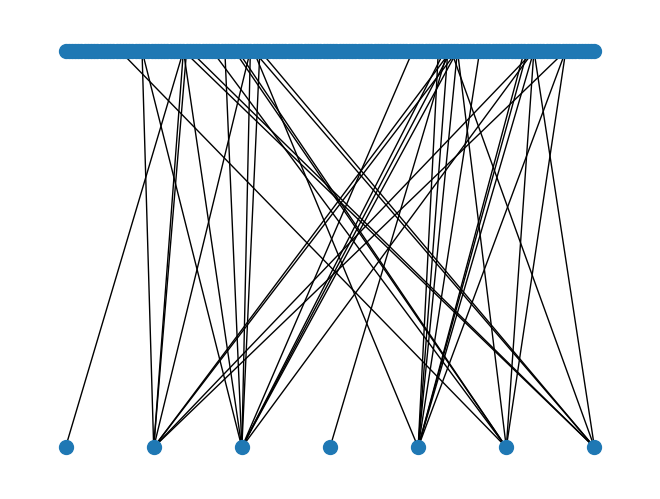

In [42]:
pos = nx.bipartite_layout(G, subset.ID_ANONIMO.unique(), align='horizontal')
nx.draw(G, pos, with_labels=False,  font_size=10, font_weight='bold', node_size=100)
#edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()